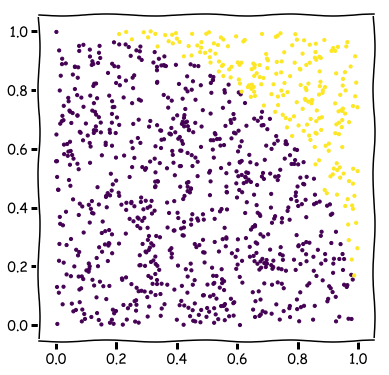

3.144

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def drawpi (points = 1000) :
    r = 1.0
    incircle = 0

    x = np.random.random(points)
    y = np.random.random(points)
    c = np.empty(points)

    for i in range(points) :
        if x[i]**2 + y[i]**2 <= r**2 :
            c[i] = 1.0
            incircle += 1
        else :
            c[i] = 2.0

    with plt.xkcd():
        plt.figure(figsize=(6,6))
        plt.scatter(x, y, c=c, s=10)
        plt.show()
    
    return 4*(incircle/points)

drawpi()

In [23]:
def lcg_rand (kMultiplier = 1366, kAddend = 150889, kPmod = 714025):

    lcg_rand.random_last = (kMultiplier * lcg_rand.random_last + kAddend) % kPmod
    return lcg_rand.random_last/kPmod

# initialize the seed
lcg_rand.random_last = 0

In [29]:
lcg_rand()

0.08631910647386296

In [31]:
def calcpi (num_trials = 10000):
    r = 1.0
    incircle = 0

    for i in range(num_trials) :
        x = lcg_rand()
        y = lcg_rand()
        if x*x + y*y <= r*r :
            incircle += 1
    
    return 4*(incircle/num_trials)    

In [32]:
calcpi()

3.1104

In [102]:
import math

lcg_rand.random_last = 0

for decade in range(7) :
    trials = 10**decade
    for j in range(3) :
        pi = calcpi(trials)
        print(f'{trials:8d} trials pi = {pi:.5f} deviation {abs(pi-math.pi):.5f}')

       1 trials pi = 4.00000 deviation 0.85841
       1 trials pi = 0.00000 deviation 3.14159
       1 trials pi = 4.00000 deviation 0.85841
      10 trials pi = 3.20000 deviation 0.05841
      10 trials pi = 2.80000 deviation 0.34159
      10 trials pi = 2.80000 deviation 0.34159
     100 trials pi = 3.04000 deviation 0.10159
     100 trials pi = 2.92000 deviation 0.22159
     100 trials pi = 3.16000 deviation 0.01841
    1000 trials pi = 3.11600 deviation 0.02559
    1000 trials pi = 3.10400 deviation 0.03759
    1000 trials pi = 3.07600 deviation 0.06559
   10000 trials pi = 3.15360 deviation 0.01201
   10000 trials pi = 3.12400 deviation 0.01759
   10000 trials pi = 3.16880 deviation 0.02721
  100000 trials pi = 3.14348 deviation 0.00189
  100000 trials pi = 3.13440 deviation 0.00719
  100000 trials pi = 3.14684 deviation 0.00525
 1000000 trials pi = 3.14179 deviation 0.00020
 1000000 trials pi = 3.14120 deviation 0.00040
 1000000 trials pi = 3.14173 deviation 0.00014


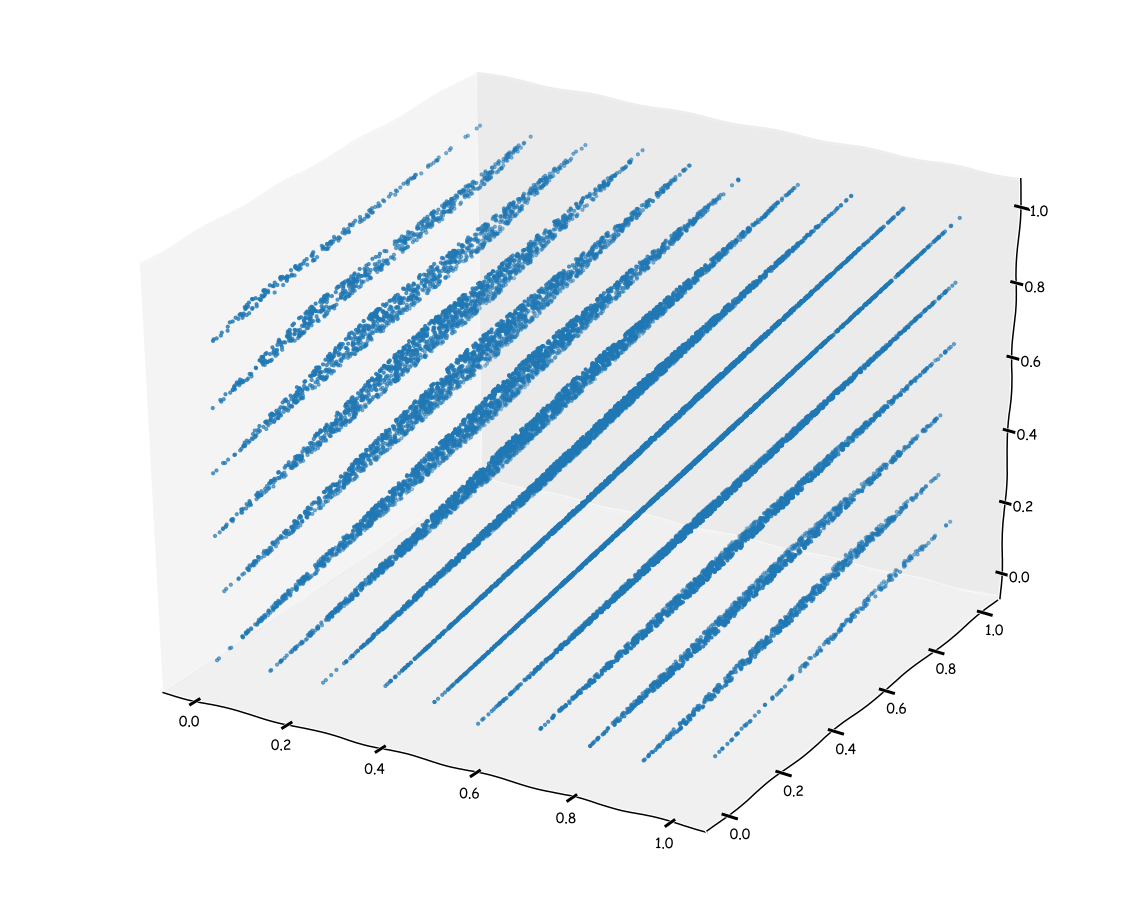

In [120]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

points = 20000

v = np.empty((3, points))

lcg_rand.random_last = 1
for i in range(points) :
    for j in range(3) :
        v[j][i] = lcg_rand(65539, 0, 2**31)

with plt.xkcd():
    fig = plt.figure(figsize=(20,16))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(v[0], v[2], v[1], s=10)
    plt.show()